# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power
    - Dependant variable Y: Mileage Per Gallon (MPG)

# STEP #1: LIBRARIES IMPORT


In [1]:
!pip install --upgrade seaborn
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.


# STEP #2: IMPORT DATASET

In [2]:
# Import essential libraries
import pandas as pd         # For data manipulation
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns       # For advanced visualization

# Optional: For machine learning or preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the CSV dataset
url = 'https://raw.githubusercontent.com/Illiyas124/Simple-Linear-Regression-for-the-Absolute-Beginner---COURSERA/refs/heads/main/FuelEconomy.csv'
fuel_df = pd.read_csv(url)

# Display first 5 rows to check
print(fuel_df.head())


   Horse Power  Fuel Economy (MPG)
0   118.770799           29.344195
1   176.326567           24.695934
2   219.262465           23.952010
3   187.310009           23.384546
4   218.594340           23.426739


In [5]:
fuel_df.columns

Index(['Horse Power', 'Fuel Economy (MPG)'], dtype='object')

In [6]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
# Number of rows and columns
fuel_df.shape


(100, 2)

In [8]:
# Summary statistics for numerical columns
fuel_df.describe()


,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [9]:
# Count missing values in each column
fuel_df.isnull().sum()


,0
Horse Power,0
Fuel Economy (MPG),0


In [10]:
fuel_df.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


# STEP#3: VISUALIZE DATASET

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


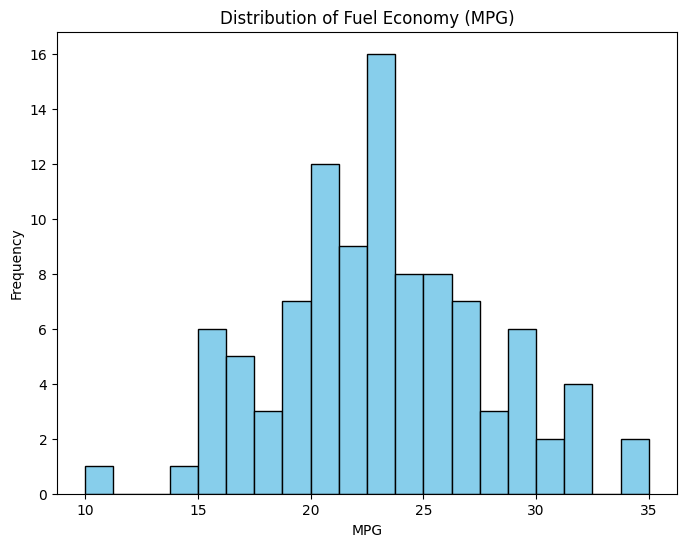

In [12]:
# Histogram of Fuel Economy (MPG)
plt.figure(figsize=(8,6))
plt.hist(fuel_df['Fuel Economy (MPG)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Fuel Economy (MPG)')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()


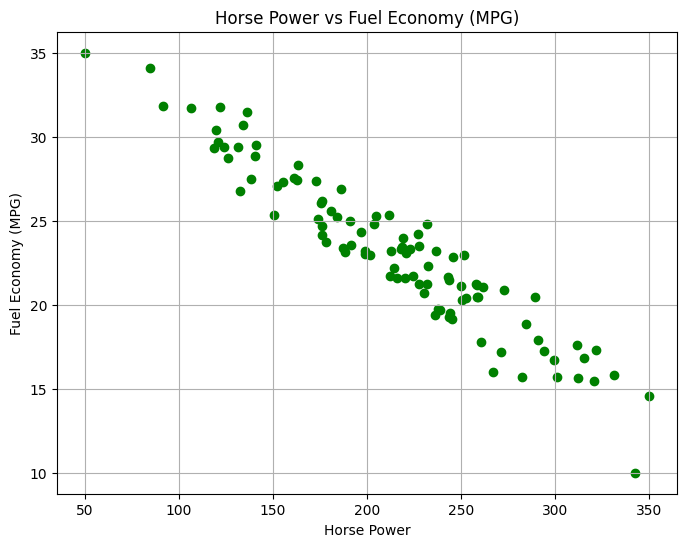

In [13]:
# Scatter plot of Horse Power vs Fuel Economy
plt.figure(figsize=(8,6))
plt.scatter(fuel_df['Horse Power'], fuel_df['Fuel Economy (MPG)'], color='green')
plt.title('Horse Power vs Fuel Economy (MPG)')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.grid(True)
plt.show()


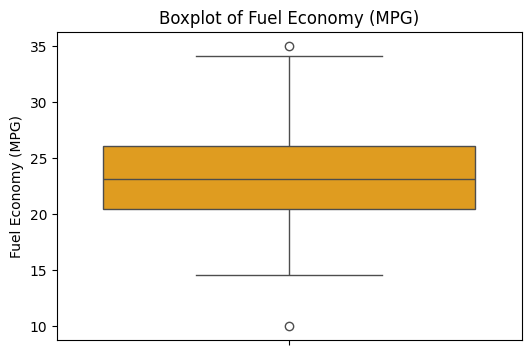

In [14]:
# Boxplot for Fuel Economy
plt.figure(figsize=(6,4))
sns.boxplot(y=fuel_df['Fuel Economy (MPG)'], color='orange')
plt.title('Boxplot of Fuel Economy (MPG)')
plt.show()


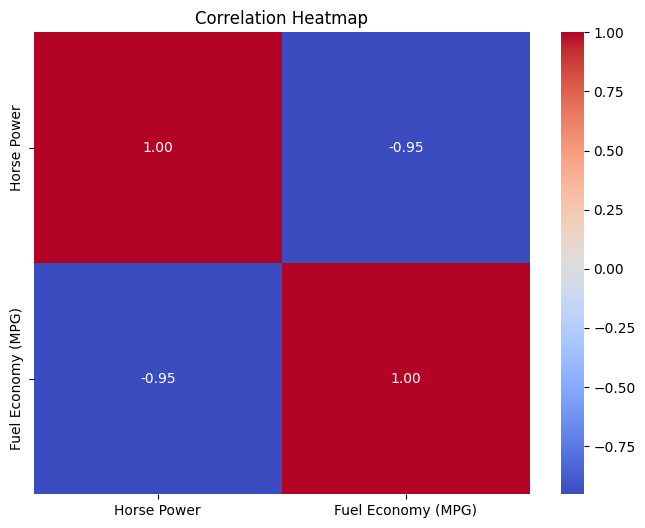

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(fuel_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


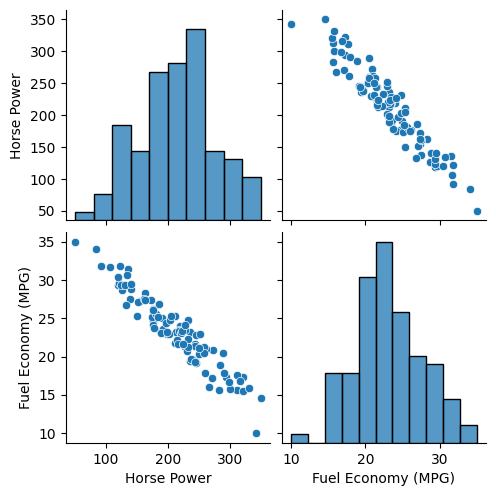

In [16]:
# Pair plot to visualize relationships
sns.pairplot(fuel_df)
plt.show()


# STEP#4: CREATE TESTING AND TRAINING DATASET

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Feature(s)
X = fuel_df[['Horse Power']]  # Input feature(s)

# Target variable
y = fuel_df['Fuel Economy (MPG)']  # Output/target


In [19]:
# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (70, 1)
X_test shape: (30, 1)
y_train shape: (70,)
y_test shape: (30,)


In [21]:
# Preview first 5 rows of training features and target
print(X_train.head())
print(y_train.head())


    Horse Power
11   120.484236
47   244.358343
85   238.836490
28    91.440264
93   131.542116
11    29.678637
47    19.536770
85    19.674094
28    31.806706
93    29.397567
Name: Fuel Economy (MPG), dtype: float64


# STEP#5: TRAIN THE MODEL

In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
# Create a Linear Regression model
model = LinearRegression()


In [24]:
# Fit the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Predict Fuel Economy on testing data
y_pred = model.predict(X_test)

# Preview first 5 predictions
print(y_pred[:5])


[21.83671023 20.48272796 22.49837094 29.1252651  22.16956598]


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 1.674949971110832
R-squared: 0.9133154290618397


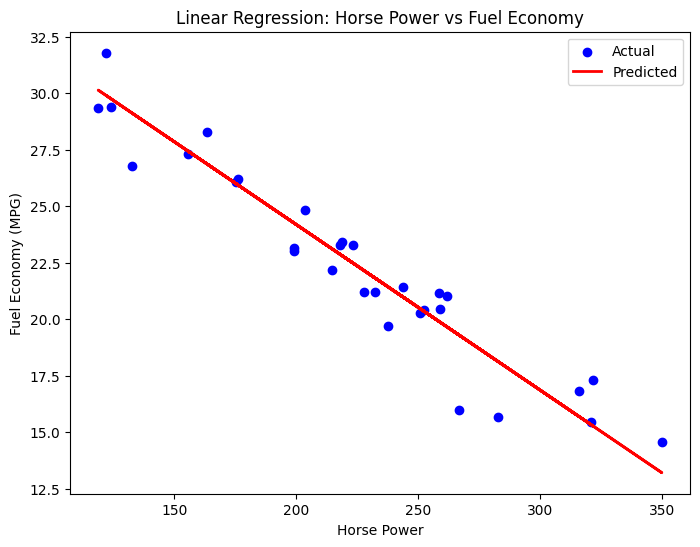

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Horse Power vs Fuel Economy')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.legend()
plt.show()


# STEP#6: TEST THE MODEL

In [28]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Preview first 5 predictions vs actual values
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test.values[:5])


Predicted values: [21.83671023 20.48272796 22.49837094 29.1252651  22.16956598]
Actual values: [21.21635929 20.2917659  23.3071922  26.77814827 21.20598653]


Evaluate Model performance

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

# R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 1.674949971110832
Root Mean Squared Error: 1.2941985825640638
R-squared: 0.9133154290618397


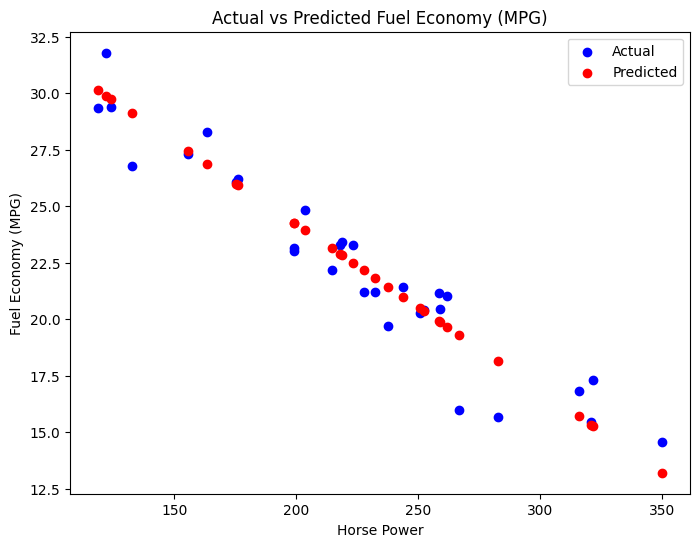

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Fuel Economy (MPG)')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.legend()
plt.show()
